### 1. Defining the Question

##### a) Specifying the Question

> You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to make a prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly

##### b) Defining the Metric for Success

> The project will be considered a success if the models created are able to predict results of a game to an accuracy of at least 80%

##### c) Understanding the Context

> FIFA is a non-profit organization that describes itself as an international governing body of association football, futsal and beach soccer. It is the highest governing body of association football. It is responsible for the rules of association football, the regulation of the sport, the promotion of football across the world.


> We are supposed to predict the result of a game between team 1 and 2 based on who's home and who's away, and on whether or not the game is friendly


> This will be done by using machine learning models to calculate the points of each team and predict the possible winner of the game

##### d) Recording the Experimental Design

> Perform your EDA

> Perform any necessary feature engineering 

> Check of multicollinearity

> Start building the model

> Cross-validate the model

> Compute RMSE

> Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test

> Perform appropriate regressions on the data including your justification

> Challenge your solution by providing insights on how you can make improvements.

##### e) Data Relevance

> The data provided for this project is relevant and has been provided by Mchezopesa Ltd and is available on their website.

### 2. Reading Data

In [294]:
# let's import the libraries we need to use for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedKFold
from scipy.stats import bartlett, chi2, loguniform
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression, RidgeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

In [295]:
# let's import the datasets
results_df = pd.read_csv('results.csv')

In [296]:
# let's import the second dataset
fifa_df = pd.read_csv('fifa_ranking.csv')

### 3. Checking Data

In [297]:
# let's preview the datasets
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


> These are the top 5 rows of the first dataset.

In [298]:
# let's preview the datasets
fifa_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


> These are the top 5 rows of the second dataset.

In [299]:
# let's check the tail of the datasets
results_df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


> These are the last 5 rows of the first dataset.

In [300]:
# let's check the tail of the datasets
fifa_df.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


> These are the last 5 rows of the second dataset.

In [301]:
# let's use a print function to check the shape of the datasets
print('The results dataset has {} rows and {} columns.'.format(results_df.shape[0], results_df.shape[1]))


The results dataset has 40839 rows and 9 columns.


> The first dataset has 40839 rows and 9 columns.

In [302]:
# let's use a print function to check the shape of the datasets
print('The fifa dataset has {} rows and {} columns.'.format(fifa_df.shape[0], fifa_df.shape[1]))

The fifa dataset has 57793 rows and 16 columns.


> The second dataset has 57793 rows and 16 columns.

In [303]:
# let's check the data types of the datasets
results_df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

> These are the columns of the first dataset.

In [304]:
# let's check the data types of the datasets
fifa_df.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

> These are the columns of the second dataset.

In [306]:
# let's see a description of the datasets
results_df.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [307]:
# let's see a description of the datasets
fifa_df.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


### 4. External Data Source Validation

> The teams that are playing in the game have been verified from the FIFA website and the matches actually played.

### 5. Tidying the Dataset

In [308]:
# let's check for null values
results_df.isnull().sum().any()

False

> The first dataset does not have any null values

In [309]:
# let's check for null values
fifa_df.isnull().sum().any()

False

> The second dataset has no null values

In [310]:
# let's check for anomalies
results_df.duplicated().sum().any()

False

> There is no duplicate data in the first dataset

In [311]:
# let's check for anomalies
fifa_df.duplicated().sum().any()

True

In [312]:
# let's drop the duplicated data
fifa_df.drop_duplicates(inplace=True)
# checking for duplicated data again
fifa_df.duplicated().sum().any()

False

> The second dataset however has some duplicate data

In [313]:
# Outliers
# let's create a function that checks for the percentage of outliers in a dataset using Interquartile range
def check_outliers(df):
    # instantiate the quantile variables
    Quantile_1, Quantile_2, Quantile_3 = 0, 0, 0

    # converting to dataframe
    check_outliers = pd.DataFrame()

    # let's get the numerical columns
    num_cols = df.select_dtypes(include=['int64', 'float64'])

    # getting the quantiles from the numerical columns
    Quantile_1 = num_cols.quantile(0.25)
    Quantile_3 = num_cols.quantile(0.75)

    # let's get the IQR
    IQR = Quantile_3 - Quantile_1

    # let's get the outliers
    check_outliers = num_cols[((num_cols < (Quantile_1 - 1.5 * IQR)) | (num_cols > (Quantile_3 + 1.5 * IQR))).any(axis=1)]

    # printing the number of outliers and the percentage of outliers
    print('There are {} outliers in the dataset.'.format(check_outliers.shape[0]))
    print('The percentage of outliers in the dataset is {}%.'.format(round((check_outliers.shape[0] / df.shape[0]) * 100, 2)))

    # reusable #

In [314]:
# outliers in the results dataset
check_outliers(results_df)

There are 5683 outliers in the dataset.
The percentage of outliers in the dataset is 13.92%.


In [315]:
# outliers in the fifa dataset
check_outliers(fifa_df)

There are 21235 outliers in the dataset.
The percentage of outliers in the dataset is 36.77%.


> We wont be dropping any outliers for both datasets as these are crucial datasets

In [316]:
# let's copy the fifa dataset to a new dataset in order to ranks for the away team during merging
fifa_df_copy = fifa_df.copy()

# let's merge the two datasets
main_merged = pd.merge(pd.merge(results_df, fifa_df, left_on=['date', 'home_team'], how = 'inner', right_on = ['rank_date', 'country_full']), fifa_df_copy, left_on=['date', 'away_team'], how = 'inner', right_on = ['rank_date', 'country_full'])

In [317]:
# let's merge the two fifa dataframes using an inner join
merged_df = pd.merge(pd.merge(results_df, fifa_df[['rank', 'country_full', 'rank_date']], how='inner', 
            left_on=['date', 'home_team'], 
            right_on=['rank_date', 'country_full']), fifa_df_copy[['rank', 'country_full', 'rank_date']], how='inner',
            left_on=['date', 'away_team'],
            right_on=['rank_date', 'country_full'])

# let's check the shape of the merged dataframe
merged_df.shape

# preview the merged dataframe
merged_df.head()

# let's drop the duplicate columns
merged_df.drop(['rank_date_x', 'rank_date_y', 'country_full_x', 'country_full_y', 'neutral', 'country', 'city'], axis=1, inplace=True)

# let's rename the rank_x and rank_y columns to home_team_rank and away_team_rank
merged_df.rename(columns={'rank_x': 'home_team_rank', 'rank_y': 'away_team_rank'}, inplace=True)

# preview the merged dataframe
merged_df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,22
1,1993-08-08,Brazil,Mexico,1,1,Friendly,8,14
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,35,94
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,65,86
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,67,5


In [318]:
# let's add a results column to the merged dataframe to help us 
# compute the points and to know whether or not a team won by appending a W for won, a D for draw and a L for lost based on the home team's goals
merged_df['results'] = merged_df.apply(lambda row: 'W' if row['home_score'] > row['away_score'] else ('D' if row['home_score'] == row['away_score'] else 'L'), axis=1)

# preview the changes to dataframe
merged_df.tail(5)

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,results
866,2018-06-07,England,Costa Rica,2,0,Friendly,12,23,W
867,2018-06-07,Uruguay,Uzbekistan,3,0,Friendly,14,95,W
868,2018-06-07,Portugal,Algeria,3,0,Friendly,4,66,W
869,2018-06-07,Iceland,Ghana,2,2,Friendly,22,47,D
870,2018-06-07,India,New Zealand,1,2,Intercontinental Cup,97,120,L


### 6. Exploratory Analysis

##### Univariate Analysis

In [322]:
# let's see the numerical columns of the merged dataframe as a list
numerical = merged_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical

['home_score', 'away_score', 'home_team_rank', 'away_team_rank']

In [376]:
# let's see the categorical columns of the merged dataframe as a list
categorical = merged_df.select_dtypes(include=['object']).columns.tolist()
categorical

# let's exclude date
#numerical.remove('date')
numerical

['home_score', 'away_score', 'home_team_rank', 'away_team_rank']

In [323]:
# let's see the value counts for tournaments
merged_df['tournament'].value_counts()

Friendly                                      574
FIFA World Cup qualification                  134
UEFA Euro qualification                        37
AFC Asian Cup qualification                    31
Cyprus International Tournament                 8
Gulf Cup                                        7
AFF Championship                                7
CECAFA Cup                                      6
Copa América                                    6
African Cup of Nations qualification            5
Gold Cup                                        5
African Cup of Nations                          4
AFC Asian Cup                                   4
SAFF Cup                                        4
African Nations Championship                    3
Malta International Tournament                  3
United Arab Emirates Friendship Tournament      3
King's Cup                                      3
CFU Caribbean Cup                               2
Merdeka Tournament                              2


> Friendlies were the most played tournament followed by the Fifa world cup qualifications.

In [324]:
# let's see the value counts for results
merged_df['results'].value_counts()

W    420
D    226
L    225
Name: results, dtype: int64

> In most cases, the home team won the game based on our analysis as shown below:

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


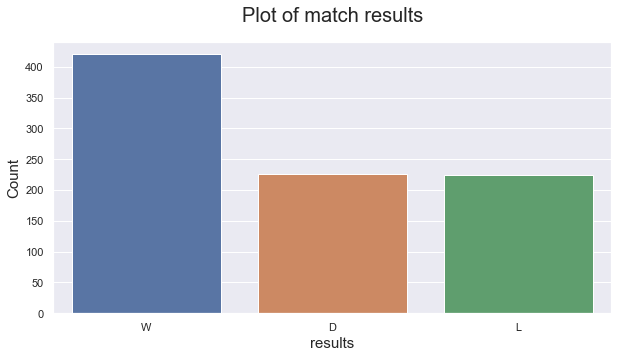

In [325]:
# let's see the value counts for results 
fig,ax  = plt.subplots(figsize = (10,5))
sns.countplot(merged_df['results'])
plt.title('Plot of match results', fontsize=20, y = 1.05)
plt.xlabel('results', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [326]:
# value counts for home team
merged_df['home_team'].value_counts()

Mexico          23
Estonia         15
Saudi Arabia    15
Portugal        15
Greece          14
                ..
Haiti            1
Canada           1
Indonesia        1
Palestine        1
Grenada          1
Name: home_team, Length: 160, dtype: int64

> Mexico evidently had the highest number of games played by teams as the home team.

In [327]:
# value counts for away team
merged_df['away_team'].value_counts()

Uruguay                     15
Argentina                   15
Kuwait                      14
Israel                      13
Bulgaria                    13
                            ..
Eritrea                      1
Tajikistan                   1
Turks and Caicos Islands     1
Sierra Leone                 1
Mongolia                     1
Name: away_team, Length: 159, dtype: int64

> Uruguay had the highest number of games played by teams as the away team.

In [328]:
# let's get the mean of the numerical columns
merged_df.mean()

/var/folders/rh/hyhcn5f12jqd6_4fz9f24wg80000gn/T/ipykernel_12152/1914520772.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged_df.mean()


home_score         1.632606
away_score         1.004592
home_team_rank    65.549943
away_team_rank    69.918485
dtype: float64

In [329]:
# let's get the median of the numerical columns
merged_df.median()

/var/folders/rh/hyhcn5f12jqd6_4fz9f24wg80000gn/T/ipykernel_12152/1669248640.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged_df.median()


home_score         1.0
away_score         1.0
home_team_rank    58.0
away_team_rank    61.0
dtype: float64

In [330]:
# let's see the outliers in the merged dataframe
check_outliers(merged_df)

There are 32 outliers in the dataset.
The percentage of outliers in the dataset is 3.67%.


> Outliers form a small percentage of the dataframe so removing them won't adversly affect our results.

In [331]:
# let's remove the outliers using quantile method
Q_1 = merged_df[numerical].quantile(0.10)
Q_3 = merged_df[numerical].quantile(0.90)
IQR = Q_3 - Q_1

# removing the outliers
Merged_df = merged_df[~((merged_df[numerical] < (Q_1 - 1.5 * IQR)) | (merged_df[numerical] > (Q_3 + 1.5 * IQR))).any(axis=1)]

# let's check the shape after removing the outliers
Merged_df.shape

(854, 9)

In [343]:
# let's create a function to output boxplots of numerical columns
def Numerical_boxplot(column, df1, df2):
    fig, ax = plt.subplots(2, 2, figsize=(15,12))

    # for distribution plots for outliers:
    sns.distplot(df1[column], ax=ax[0,0], color='blue', hist=True)
    ax[0,0].set_title('Distribution Plot of {}'.format(column), fontsize=15)
    ax[0,0].set_xlabel('{}'.format(column), fontsize=15)
    ax[0,0].set_ylabel('Count', fontsize=15)

    # for boxplots for outliers:
    sns.boxplot(y=df1[column], ax=ax[0,1], color='blue')
    ax[0,1].set_title('Boxplot of {}'.format(column), fontsize=15)
    ax[0,1].set_xlabel('{}'.format(column), fontsize=15)

    # for distribution plots for non-outliers:
    sns.distplot(df2[column], ax=ax[1,0], color='green', hist=True)
    ax[1,0].set_title('Distribution Plot without outliers for {}'.format(column), fontsize=15)
    ax[1,0].set_xlabel('{}'.format(column), fontsize=15)
    ax[1,0].set_ylabel('Count', fontsize=15)

    # for boxplots for non-outliers:
    sns.boxplot(y=df2[column], ax=ax[1,1], color='green')
    ax[1,1].set_title('Boxplot without outliers for {}'.format(column), fontsize=15)
    ax[1,1].set_xlabel('{}'.format(column), fontsize=15)
    plt.show()

In [348]:
# let's see our numerical columns
numerical

['home_score', 'away_score', 'home_team_rank', 'away_team_rank']

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


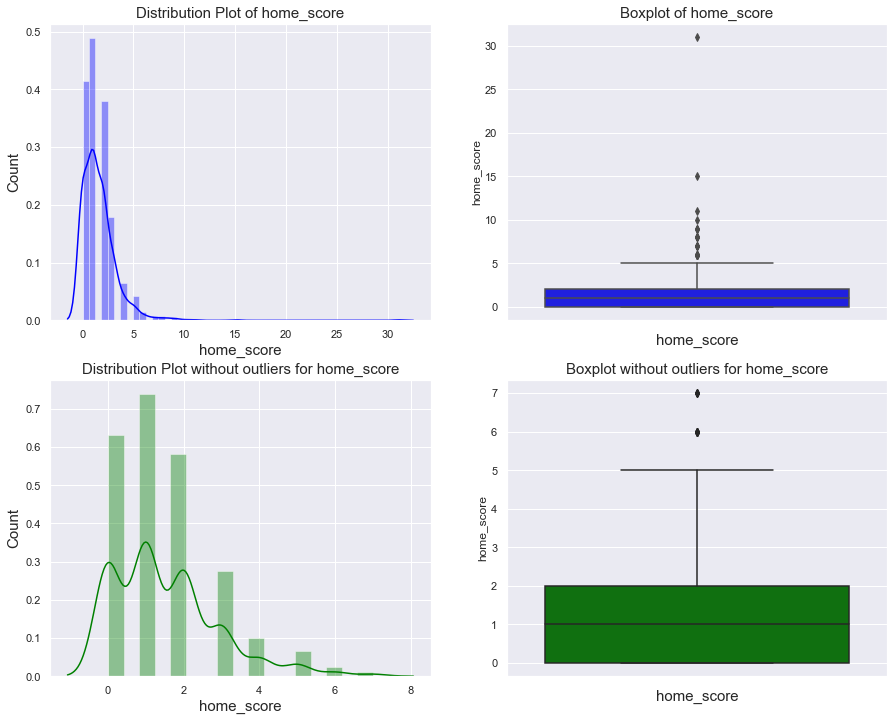

In [344]:
# let's create a boxplot and distribution of before and after removing outliers for home team 
Numerical_boxplot(numerical[0], merged_df, Merged_df)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


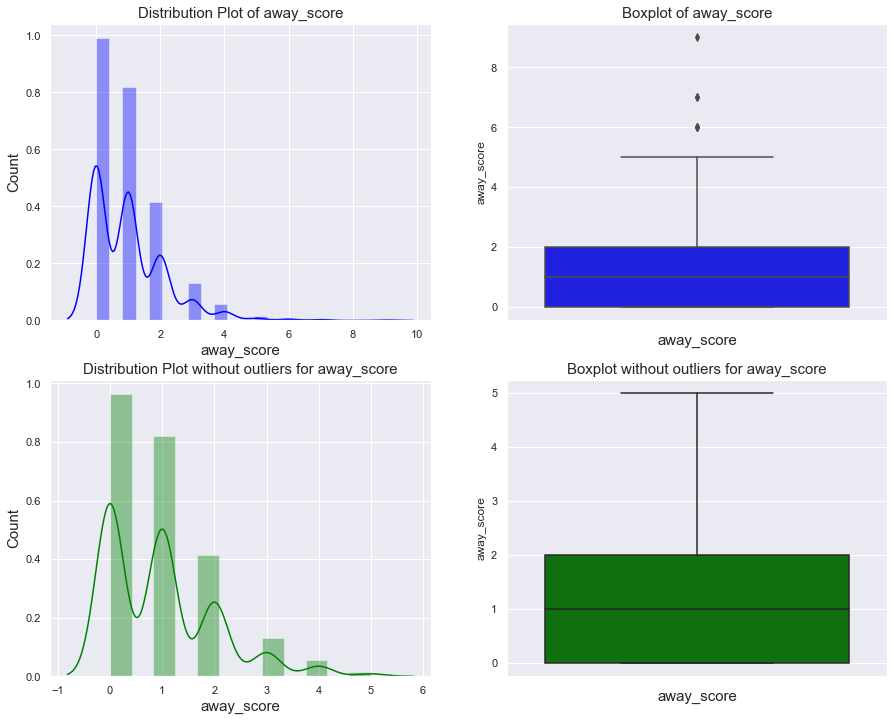

In [345]:
# let's create a boxplot and distribution of before and after removing outliers for away team
Numerical_boxplot(numerical[1], merged_df, Merged_df)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


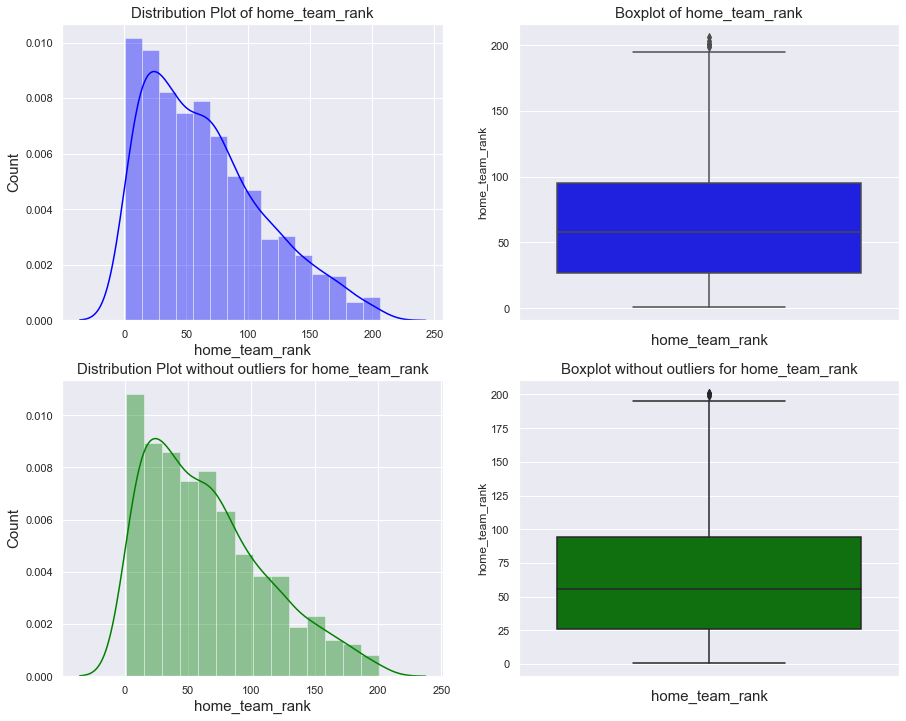

In [346]:
# below is a boxplot and a distribution plot of home team rank before removing outliers
Numerical_boxplot(numerical[2], merged_df, Merged_df)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


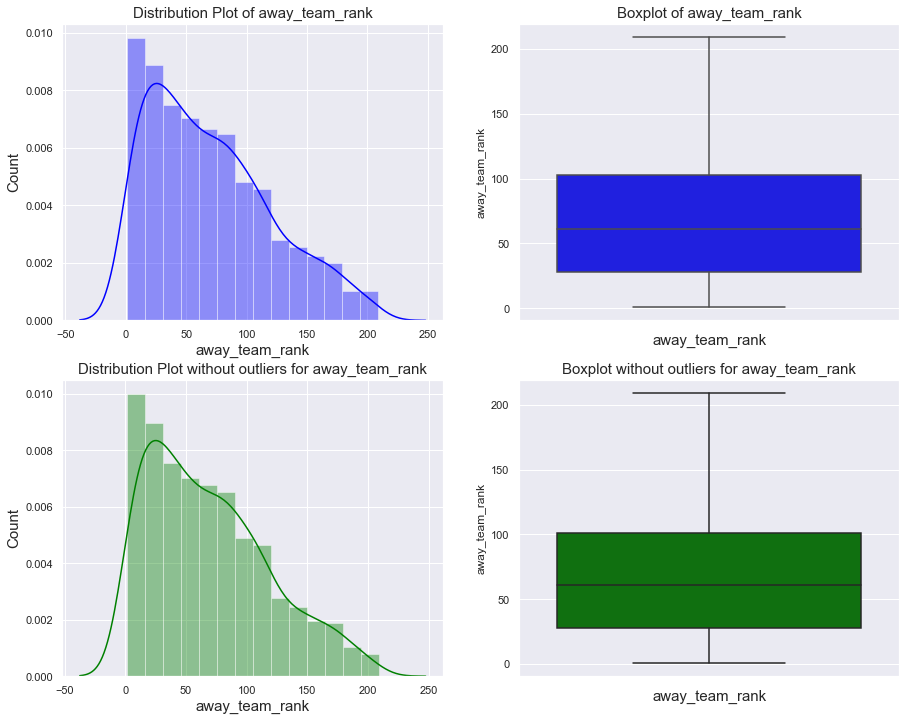

In [347]:
# below is a boxplot and a distribution plot of away team rank before removing outliers
Numerical_boxplot(numerical[3], merged_df, Merged_df)

##### Bivariate Analysis

In [371]:
# we will create functions to help in bivariate analysis
# categorical categorical columns

# i) a function to generate a crosstab
def crosstab(x, y, df):
    ct = pd.crosstab(df[x], df[y])
    ct.plot.bar(stacked=True, figsize=(10,5))
    plt.title('Crosstab of {} and {}'.format(x, y), fontsize=15)
    plt.xlabel('{}'.format(x), fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.show()

# ii) a function to generate a countplot
def countplot(x, df):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.countplot(df[x])
    plt.title('Countplot of {}'.format(x), fontsize=15)
    plt.xlabel('{}'.format(x), fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.show()

# numerical numerical columns

# i) a function to generate a line scatter plot
def line_scatter(x, y, df):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.regplot(x=x, y=y, data=df, ax=ax)
    plt.title('Line Scatter Plot of {} and {}'.format(x, y), fontsize=15)
    plt.xlabel('{}'.format(x), fontsize=15)
    plt.ylabel('{}'.format(y), fontsize=15)
    plt.show()

# ii) a function to generate a heatmap
def heatmap(x, y, df):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.heatmap(df.corr(), annot=True, ax=ax)
    plt.title('Heatmap of {} and {}'.format(x, y), fontsize=15)
    plt.xlabel('{}'.format(x), fontsize=15)
    plt.ylabel('{}'.format(y), fontsize=15)
    plt.show()

# pearson correlation
def corr(x, y, df):
    print('Pearson correlation of {} and {} is {}'.format(x, y, df[x].corr(df[y])))

In [369]:
# let's see our numerical columns
numerical

['home_score', 'away_score', 'home_team_rank', 'away_team_rank']

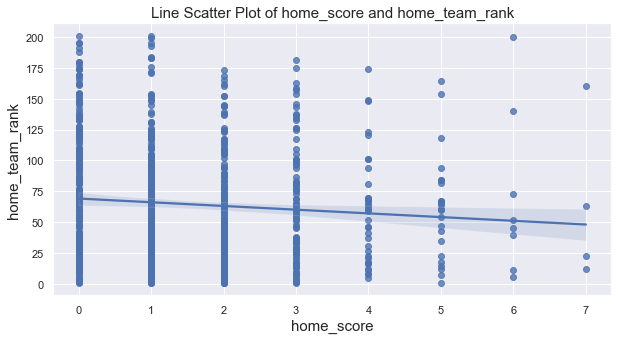

In [372]:
# let's create a line scatter plot for home team vs rank
line_scatter(numerical[0], numerical[2], Merged_df)

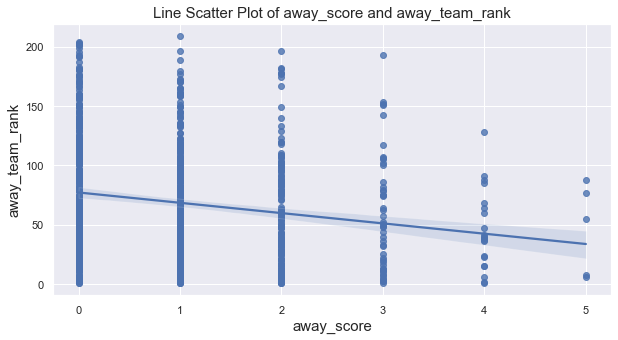

In [356]:
# let's create a line scatter plot for away team vs rank
line_scatter(numerical[1], numerical[3], Merged_df)

In [360]:
# let's see the pearson correlation 
corr(numerical[0], numerical[2], Merged_df)

Pearson correlation of home_score and home_team_rank is -0.08813422585625434


> The correlation between the home and away team's goals scored is a very weak and negative correlation.

In [361]:
# let's see the pearson correlation
corr(numerical[1], numerical[3], Merged_df)

Pearson correlation of away_score and away_team_rank is -0.18334471105556022


> The correlation between the home and away team's goals conceded is a very weak and negative correlation.

In [363]:
# pearsons correlation for home team score vs away team rank
corr(numerical[0], numerical[3], Merged_df)

Pearson correlation of home_score and away_team_rank is 0.27211957504456985


> The correlation between the home and away team's goals conceded is a very weak and positive correlation.

In [364]:
# pearsons correlation for away team score vs home team rank
corr(numerical[1], numerical[2], Merged_df)

Pearson correlation of away_score and home_team_rank is 0.0859150604781305


> The correlation between the home and away team's goals conceded is a very strong and positive correlation.

##### Encoding the Data

##### We will convert the categorical variables to dummy variables using dict vectorizer

In [382]:
# let's check the unique categories in categorical column using a for loop
categorical

# let's remove date
#categorical.remove('date')

# preview
categorical

# let's check the unique categories in categorical column using a for loop

for i in categorical:
    print(f'{i} : {len(Merged_df[i].unique())}')

home_team : 156
away_team : 156
tournament : 38
results : 3


In [394]:
# let's convert date column to datetime
Merged_df['date'] = pd.to_datetime(Merged_df['date'])
Merged_df.dtypes

/var/folders/rh/hyhcn5f12jqd6_4fz9f24wg80000gn/T/ipykernel_12152/461310803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Merged_df['date'] = pd.to_datetime(Merged_df['date'])


date              datetime64[ns]
home_team                 object
away_team                 object
home_score                 int64
away_score                 int64
tournament                object
home_team_rank             int64
away_team_rank             int64
results                   object
dtype: object

In [397]:
# let's set a copy of the merged dataframe and split the date column into year, month and day and use year

merged_copy = Merged_df.copy()


# let's split the date column into year, month and day
merged_copy['year'] = merged_copy.date.dt.year
merged_copy['month'] = merged_copy.date.dt.month
merged_copy['day'] = merged_copy.date.dt.day

# preview the changes
merged_copy.head()

# let's drop the date column
merged_copy.drop('date', axis=1, inplace=True)
merged_copy

,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,results,year,month,day
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,22,W,1993,8,8
1,Brazil,Mexico,1,1,Friendly,8,14,D,1993,8,8
2,Ecuador,Venezuela,5,0,FIFA World Cup qualification,35,94,W,1993,8,8
3,Guinea,Sierra Leone,1,0,Friendly,65,86,W,1993,8,8
4,Paraguay,Argentina,1,3,FIFA World Cup qualification,67,5,L,1993,8,8
...,...,...,...,...,...,...,...,...,...,...,...
866,England,Costa Rica,2,0,Friendly,12,23,W,2018,6,7
867,Uruguay,Uzbekistan,3,0,Friendly,14,95,W,2018,6,7
868,Portugal,Algeria,3,0,Friendly,4,66,W,2018,6,7
869,Iceland,Ghana,2,2,Friendly,22,47,D,2018,6,7


#### Multicollinearity

In [401]:
# let's get the VIF for each numerical column
correlation = merged_copy.corr()
  
inverse_correlation = pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)

inverse_correlation

,home_score,away_score,home_team_rank,away_team_rank,year,month,day
home_score,1.187413,-0.006158,0.383345,-0.554213,0.109893,0.027673,0.028028
away_score,-0.006158,1.089102,-0.285010,0.348138,0.025506,0.010509,0.003187
home_team_rank,0.383345,-0.285010,1.627707,-1.007967,-0.119714,0.111992,-0.098898
away_team_rank,-0.554213,0.348138,-1.007967,1.828005,-0.245235,-0.052028,0.061313
year,0.109893,0.025506,-0.119714,-0.245235,1.421611,-0.000766,0.661629
month,0.027673,0.010509,0.111992,-0.052028,-0.000766,1.026999,-0.137946
day,0.028028,0.003187,-0.098898,0.061313,0.661629,-0.137946,1.348942


> There is no VIF greater than 5. This is a good indicator that the data is not multicollinear.

#### Model Building

In [407]:
# let's select categorical columns in the dataframe
categorical_df = list(merged_copy.select_dtypes(include=['object']).columns)

# let's see the unique values in each categorical column
for i in categorical_df:
    print(f'{i} : {len(merged_copy[i].unique())}')

print('==================================================')

# let's select numerical columns in the dataframe
numerical_df = list(merged_copy.select_dtypes(include=['float64', 'int64']).columns)
numerical_df

home_team : 156
away_team : 156
tournament : 38
results : 3


['home_score',
 'away_score',
 'home_team_rank',
 'away_team_rank',
 'year',
 'month',
 'day']

In [408]:
# let's apply label encoding to categorical columns
merged_copy[categorical_df] = merged_copy[categorical_df].apply(LabelEncoder().fit_transform)
merged_copy.head()

,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,results,year,month,day
0,19,147,3,1,16,59,22,2,1993,8,8
1,22,88,1,1,17,8,14,0,1993,8,8
2,39,150,5,0,16,35,94,2,1993,8,8
3,58,122,1,0,17,65,86,2,1993,8,8
4,108,6,1,3,16,67,5,1,1993,8,8


##### Polynomial Regression

In [414]:
# let's first create functions to help compute rmse
def Lda(degree, X_train, X_test, y_train, y_test, components = None):
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  lda = LDA(n_components= components)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  print(f'RMSE: {Polynomial(degree, X_train, X_test, y_train, y_test)}')



def Lda_noscale(degree, X_train, X_test, y_train, y_test, components = None):
  lda = LDA(n_components= components)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  print(f'RMSE: {Polynomial(degree, X_train, X_test, y_train, y_test)}')

In [415]:
def Residuals_Heteroskedasticity_LDA(degree, X_train, X_test, y_train, y_test, components = None):
  # LDA
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  lda = LDA(n_components= components)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  # Polynomial regression
  polynomial = PolynomialFeatures(degree = degree)
  X_train_poly = polynomial.fit_transform(X_train)
  X_test_poly =  polynomial.transform(X_test)
  # Regression
  poly_reg = LinearRegression()
  poly_reg.fit(X_train_poly, y_train)
  # Predictions
  y_pred_poly = poly_reg.predict(X_test_poly)
  # Obtaining ID arrays
  ypred = y_pred_poly.flatten()
  ytest = y_test.flatten()
  # Residuals
  residuals = np.subtract(ypred, ytest)
  print('Residuals Description')
  print(pd.DataFrame(residuals).describe())
  mean = residuals.mean()
  print(f'\nResiduals mean: {mean}')
  
  # Residual plot
  plt.scatter(ypred, residuals, color='black')
  plt.ylabel('Residuals')
  plt.xlabel('Fitted Values')
  plt.axhline(y= mean, color='red', linewidth=1)
  plt.show()

  # Bartlett's test
  test_statistic, p_value = bartlett(ypred, residuals)
  print(f'\nP_Vlaue = {p_value}')
  print(f'test_statistic = {test_statistic}')

  # Degrees of freedom
  df = len(ypred - 1)
  probability = 1 - p_value
  # Critical value
  critical_value = chi2.ppf(probability, df)
  print(f'Critical Value: {critical_value}')
  if (p_value < 0.05) and (test_statistic > critical_value ):
    print('Variances are unequal')
  else:
    print('Variances are equal')

In [416]:
def Residuals_Heteroskedasticity(degree, X_train, X_test, y_train, y_test, components = None):
  # Scaling
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  # Polynomial regression
  polynomial = PolynomialFeatures(degree = degree)
  X_train_poly = polynomial.fit_transform(X_train)
  X_test_poly =  polynomial.transform(X_test)
  # Regression
  poly_reg = LinearRegression()
  poly_reg.fit(X_train_poly, y_train)
  # Predictions
  y_pred_poly = poly_reg.predict(X_test_poly)
  # Obtaining ID arrays
  ypred = y_pred_poly.flatten()
  ytest = y_test.flatten()
  # Residuals
  residuals = np.subtract(ypred, ytest)
  print('Residuals Description')
  print(pd.DataFrame(residuals).describe())
  mean = residuals.mean()
  print(f'\nResiduals mean: {mean}')
  
  # Residual plot
  plt.scatter(ypred, residuals, color='black')
  plt.ylabel('Residuals')
  plt.xlabel('Fitted Values')
  plt.axhline(y= mean, color='red', linewidth=1)
  plt.show()

  # Bartlett's test
  test_statistic, p_value = bartlett(ypred, residuals)
  print(f'\nP_Vlaue = {p_value}')
  print(f'test_statistic = {test_statistic}')

  # Degrees of freedom
  df = len(ypred - 1)
  probability = 1 - p_value
  # Critical value
  critical_value = chi2.ppf(probability, df)
  print(f'Critical Value: {critical_value}')
  if (p_value < 0.05) and (test_statistic > critical_value ):
    print('Variances are unequal')
  else:
    print('Variances are equal')

In [417]:
def Polynomial(degrees, X_train, X_test, y_train, y_test):
  # Polynomial regression
  polynomial = PolynomialFeatures(degree = degrees)
  X_train_poly = polynomial.fit_transform(X_train)
  X_test_poly =  polynomial.transform(X_test)
  # Regression
  poly_reg = LinearRegression()
  poly_reg.fit(X_train_poly, y_train)
  # Predictions
  y_pred_poly = poly_reg.predict(X_test_poly)
  # Model accuracy
  rmse_poly = mean_squared_error(y_test, y_pred_poly , squared = False)
  return rmse_poly

In [418]:
def LogisticReg_LDA(X_train, X_test, y_train, y_test, components = None):
  # Scaling
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  # Dimensionality reduction  
  lda = LDA(n_components= components)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  # Model fitting
  log_reg = LogisticRegression(multi_class='auto', solver='lbfgs')
  log_reg.fit(X_train, y_train)
  # Prediction
  y_pred = log_reg.predict(X_test)
  # Evaluation
  score = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)
  print(f'Accuracy score: {score}')
  print('\nClassification Report')
  print(report)
  confusion= confusion_matrix(y_test, y_pred)
  print('\nConfusion Matrix')
  print(confusion)

def LogisticReg(X_train, X_test, y_train, y_test):
  # Scaling
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  # Model fitting
  log_reg = LogisticRegression(multi_class='auto', solver='lbfgs')
  log_reg.fit(X_train, y_train)
  # Prediction
  y_pred = log_reg.predict(X_test)
  # Evaluation
  score = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)
  print(f'Accuracy score: {score}')
  print('\nClassification Report')
  confusion= confusion_matrix(y_test, y_pred)
  print('\nConfusion Matrix')
  print(confusion)

In [422]:
merged_copy

,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,results,year,month,day
0,19,147,3,1,16,59,22,2,1993,8,8
1,22,88,1,1,17,8,14,0,1993,8,8
2,39,150,5,0,16,35,94,2,1993,8,8
3,58,122,1,0,17,65,86,2,1993,8,8
4,108,6,1,3,16,67,5,1,1993,8,8
...,...,...,...,...,...,...,...,...,...,...,...
866,42,34,2,0,17,12,23,2,2018,6,7
867,147,148,3,0,17,14,95,2,2018,6,7
868,112,2,3,0,17,4,66,2,2018,6,7
869,64,54,2,2,17,22,47,0,2018,6,7


In [423]:
# let's declare our x and y trains and tests to be used in the model
# Home team
X1 = merged_copy.drop('home_score', axis = 1).values
y1 = merged_copy.home_score.values.reshape(-1,1)

# Away team
X2 = merged_copy.drop('away_score', axis = 1).values
y2 = merged_copy.away_score.values.reshape(-1,1)

# result prediction
X3 = merged_copy.drop('results', axis = 1).values
y3 = merged_copy.results.values.reshape(-1,1)

In [425]:
# train test splits
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 0)

In [426]:
# polynomial regression for home team degree 1
Polynomial(1, X1_train, X1_test, y1_train, y1_test)

1.1101566795149114

In [427]:
# polynomial regression for home team degree 2
Polynomial(2, X1_train, X1_test, y1_train, y1_test)

0.9156027427587402

In [428]:
# polynomial regression for home team degree 3
Polynomial(3, X1_train, X1_test, y1_train, y1_test)

1.393217679017037

> For home tea goal prediction model with a degree of 2 has the lowest RMSE. This is a good model to use as its optimal equation is y = a + bx + cx^2. A linear equation.

In [429]:
# polynomial regression for away team degree 1
Polynomial(1, X2_train, X2_test, y2_train, y2_test)

1.0251540025272505

In [430]:
# polynomial regression for away team degree 2
Polynomial(2, X2_train, X2_test, y2_train, y2_test)

0.7085649160611622

In [431]:
# polynomial regression for away team degree 3
Polynomial(3, X2_train, X2_test, y2_train, y2_test)

1.1987285211736018

> For away team goal prediction model with a degree of 2 has the lowest RMSE. This is a good model to use as its optimal equation is y = a + bx + cx^2. A linear equation.

In [432]:
# let's predict the results
LogisticReg(X3_train, X3_test, y3_train, y3_test)

Accuracy score: 1.0

Classification Report

Confusion Matrix
[[51  0  0]
 [ 0 39  0]
 [ 0  0 81]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> The model has 0 incorrect predictions. It might be because oof overfitting, we therefore conduct more analysis.

In [435]:
LogisticReg_LDA(X3_train, X3_test, y3_train, y3_test, components = 1)

Accuracy score: 0.9824561403508771

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        51
           1       1.00      1.00      1.00        39
           2       1.00      0.96      0.98        81

    accuracy                           0.98       171
   macro avg       0.98      0.99      0.98       171
weighted avg       0.98      0.98      0.98       171


Confusion Matrix
[[51  0  0]
 [ 0 39  0]
 [ 3  0 78]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> Accuracy : 98%

##### Heteroscedasticity and Residuals Analysis

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Residuals Description
                0
count  171.000000
mean     0.003063
std      1.047166
min     -4.344675
25%     -0.468594
50%      0.224358
75%      0.716154
max      2.596620

Residuals mean: 0.0030629129583273408


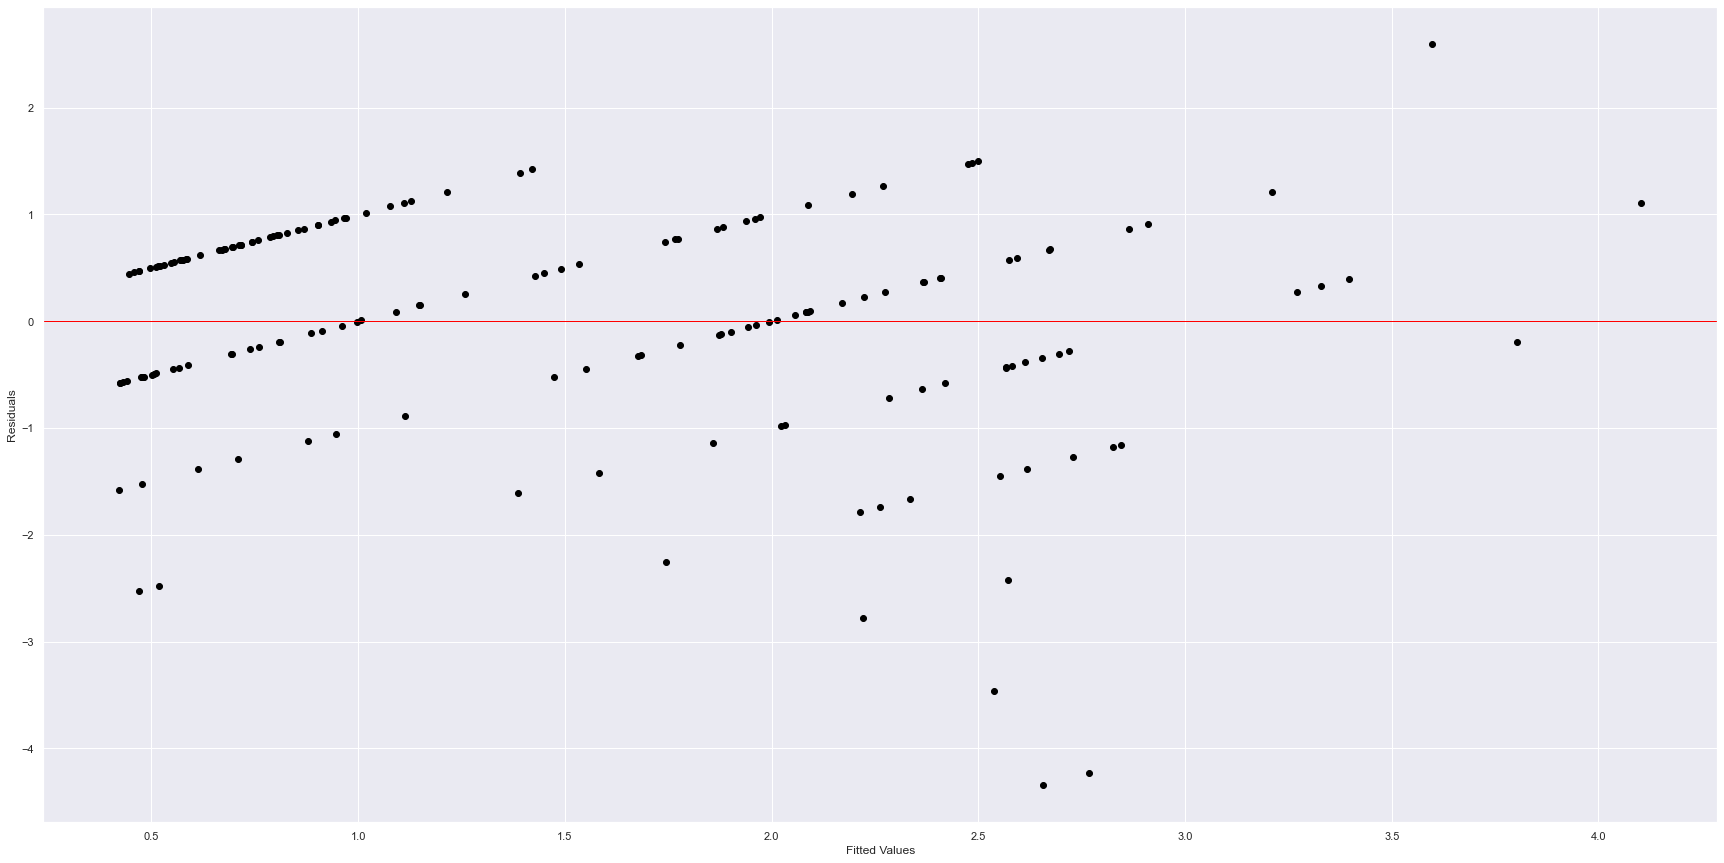


P_Vlaue = 0.033401402102440914
test_statistic = 4.525085728286975
Critical Value: 206.43011345246524
Variances are equal


In [439]:
# for the home team
Residuals_Heteroskedasticity_LDA(2, X1_train, X1_test, y1_train, y1_test, 2)

> We have equal variances from the Bartlett test and the p-value is less than 0.05. This is a good indicator that the data is not heteroscedastic. However a pattern can be observed

Residuals Description
                0
count  171.000000
mean    -0.032104
std      0.917727
min     -4.107564
25%     -0.344636
50%      0.024130
75%      0.529104
max      3.025291

Residuals mean: -0.032103799458994386


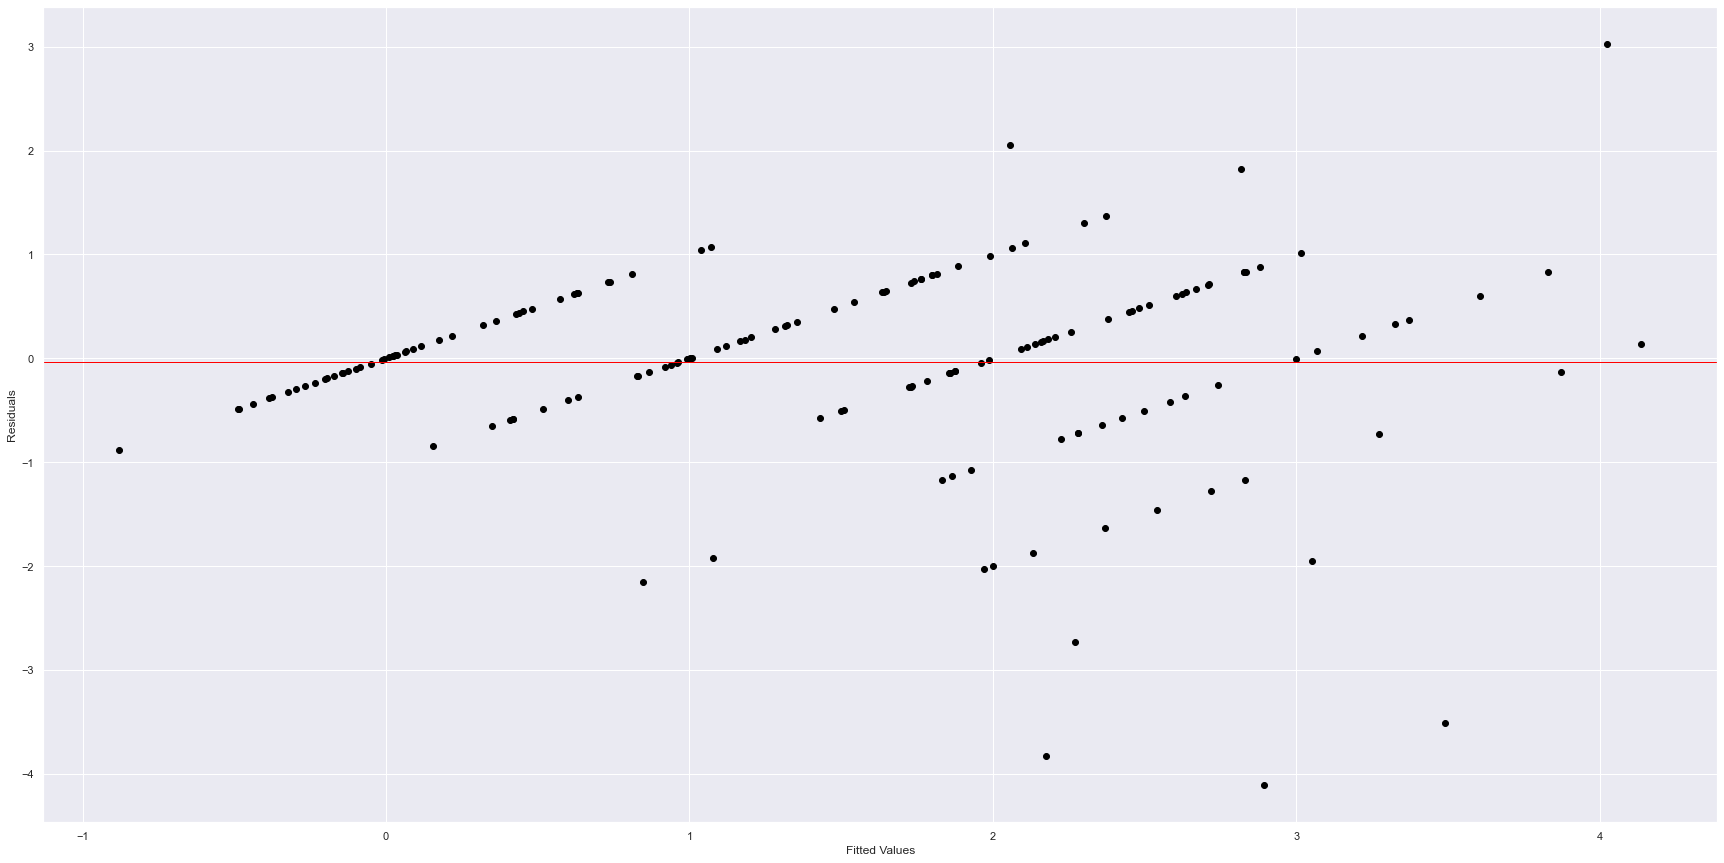


P_Vlaue = 0.006602702097828257
test_statistic = 7.377987334395319
Critical Value: 220.24058733073107
Variances are equal


In [444]:
# for away team
Residuals_Heteroskedasticity(2, X1_train, X1_test, y1_train, y1_test, 1)

> We have equal variances from the Bartlett test and the p-value is less than 0.05. This is a good indicator that the data is not heteroscedastic. However a pattern can be observed

### 8. Challenging the solution

In [233]:
# Reviewing the Solution 
#

### 9. Follow up questions

##### a). Did we have the right data?

##### b). Do we need other data to answer our question?

##### c). Did we have the right question?